In [ ]:
!pip install tensorflow matplotlib scikit-learn flask


In [3]:
# Import libraries 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define image parameters for resizing 
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Load dataset
DATASET_DIR = 'flowersclass'

# Use ImageDataGenerator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    validation_split=0.2,      # Use 20% of the data for validation
    rotation_range=20,         # Randomly rotate images by up to 20 degrees
    zoom_range=0.15,           # Random zoom on images
    width_shift_range=0.2,     # Random horizontal shift
    height_shift_range=0.2,    # Random vertical shift
    horizontal_flip=True       # Random horizontal flip
)

# Train and validation generators
train_generator = datagen.flow_from_directory(
    DATASET_DIR,                
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images
    batch_size=BATCH_SIZE,      
    class_mode='categorical',   # Use one-hot encoding for labels (multi-class)
    subset='training',          # This is the training subset
    shuffle=True                # Shuffle the data each epoch
)

val_generator = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Class names
class_names = list(train_generator.class_indices.keys())
print("Flower classes:", class_names)



Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Flower classes: ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)), # 32 filters , 3x3 kernel, ReLu Activation function
    MaxPooling2D(2, 2), # Reduces spatial size 
    
    Conv2D(64, (3, 3), activation='relu'), # 64 filters 
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'), # 128 filters
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),                             # Dropout for regularization (prevents overfitting)
    Dense(len(class_names), activation='softmax')  # 5 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show architecture
model.summary()




C:\Users\RAMANAA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       9,470,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,564,741 (36.49 MB)

 Trainable params: 9,564,741 (36.49 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


C:\Users\RAMANAA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.3401 - loss: 1.5738 - val_accuracy: 0.5410 - val_loss: 1.1591
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.5302 - loss: 1.1789 - val_accuracy: 0.5290 - val_loss: 1.1279
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.5634 - loss: 1.0924 - val_accuracy: 0.5840 - val_loss: 1.0108
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.5780 - loss: 1.0708 - val_accuracy: 0.6180 - val_loss: 0.9759
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.5981 - loss: 1.0063 - val_accuracy: 0.6360 - val_loss: 0.9366
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 1294s 10s/step - accuracy: 0.6353 - loss: 0.9473 - val_accuracy: 0.6350 - val_loss: 0.9288
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.6433 - loss: 0.9157 - val_accuracy: 0.6760 - val_loss: 0.8733
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.6506 - loss: 0.9105 - val_ac

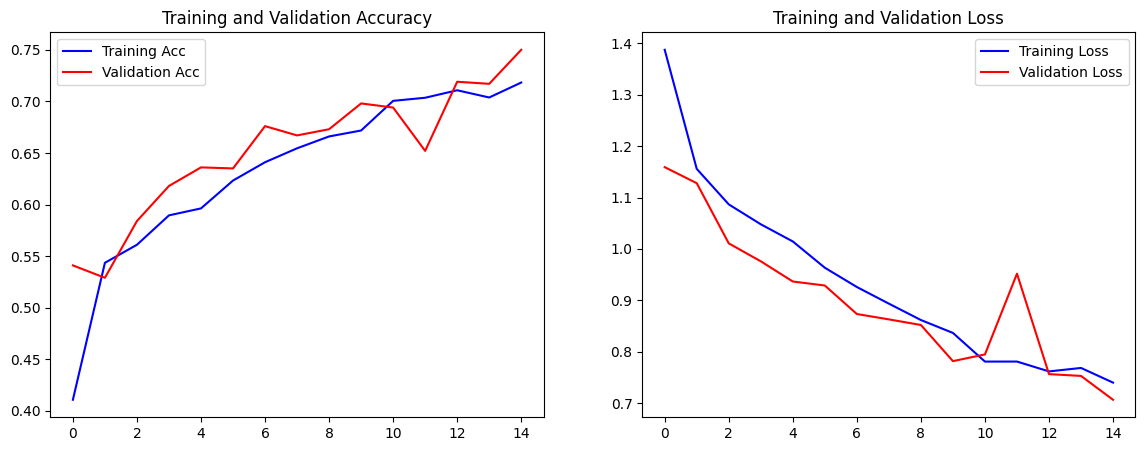

In [6]:
# Plot accuracy and loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Acc')
    plt.plot(epochs, val_acc, 'r-', label='Validation Acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    plt.show()

plot_history(history)



     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     -------- ------------------------------ 61.4/294.9 kB 1.7 MB/s eta 0:00:01
     ------------------------- ------------ 194.6/294.9 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     - -------------------------------------- 0.3/11.1 MB 9.9 MB/s eta 0:00:02
     -- ------------------------------------- 0.7/11.1 MB 9.2 MB/s eta 0:00:02
     ---- ----------------------------------- 1.3/11.1 MB 9.4 MB/s eta 0:00:02
     ------- -------------------------------- 2.1/11.1 MB 12.0 MB/s eta 0:00:01
     --------- ------------------------------ 2.7/11.1 MB 12.4 MB/s eta 0:00:01
     ------------ --------------------------- 3.4/11.1 MB 12.0 MB/s eta 0:00:01
     --------------- ------------------------ 4.2/11.1 MB 13.5 MB/s eta 0:00:01
     ------------------ --------------------- 5.0/11.1 MB 


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 479ms/step
Classification Report:
              precision    recall  f1-score   support

       Lilly       0.18      0.20      0.19       200
       Lotus       0.22      0.22      0.22       200
      Orchid       0.23      0.23      0.23       200
   Sunflower       0.19      0.21      0.20       200
       Tulip       0.16      0.14      0.15       200

    accuracy                           0.20      1000
   macro avg       0.20      0.20      0.20      1000
weighted avg       0.20      0.20      0.20      1000



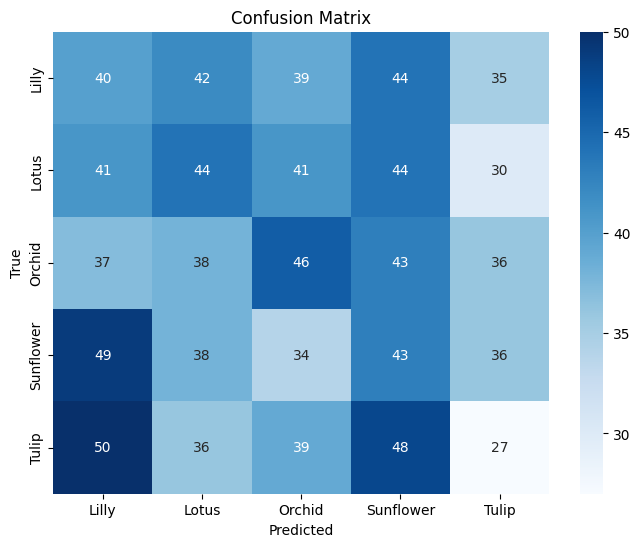

In [8]:
!pip install seaborn
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on validation set
val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = val_generator.classes

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [9]:
model.save("flower_classifier_model.h5")
